In [1]:
import time
inicio = time.time()

# Carga de Paquetes y Librerias

In [2]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Google
from google.colab import files  # Permite descargar archivos directamente desde Colab


In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [4]:
def TrainingSets(data, dataξ,step_back):
    train_data  = data.copy()
    train_dataξ = dataξ.copy()
    # training set
    X_train, ξ_train = [], []
    for i in range(len(train_data)-step_back - 1):
        a = train_data[i:(i+step_back)]
        X_train.append(a)
        ξ_train.append(train_dataξ[i + step_back])
    X_train = np.array(X_train); ξ_train = np.array(ξ_train);
    return  X_train, ξ_train

# Carga de Base de Datos

In [5]:
#cargar datos desde drive acceso libre
FILEID = "1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt
!unzip Departamentos.zip
!dir

--2023-07-22 03:36:04--  https://docs.google.com/uc?export=download&confirm=&id=1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_
Resolving docs.google.com (docs.google.com)... 173.194.74.100, 173.194.74.102, 173.194.74.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.74.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/15ueochc8ij78laa5th5ak5jf5e3kolm/1689996900000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=fd159ab7-c6cd-405d-8dfc-a22168073f32 [following]
--2023-07-22 03:36:11--  https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/15ueochc8ij78laa5th5ak5jf5e3kolm/1689996900000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=fd159ab7-c6cd-405d-8dfc-a22168073f32
Resolving doc-0c-6k-docs.googleusercontent.com (doc-0c-6k-docs.googleusercontent.com)... 209.85.147.132, 2

In [6]:
ls

Demanda_Arreglo_LSTM_Rd_CL.xlsx   Demanda_Arreglo_Mean.xlsx
Demanda_Arreglo_LSTM_Rd_Sin.xlsx  Departamentos.zip
Demanda_Arreglo_LSTM_Rd.xlsx      sample_data/


In [7]:
df=pd.read_excel('/content/Demanda_Arreglo_Mean.xlsx')
df.fillna(df.mean(), inplace=True)

In [8]:
df = df.drop('Date', axis=1)
# Se establese nuevamente en el indice temporal en la nueva variable 'a', y al DataFrame se incliye la informacion de frecuencia horaria 'H' de la base de datos
date_rng = pd.date_range(start='2020-10-01', end='2023-01-01', freq='H')
# Establece el índice del DataFrame a las fechas generadas
df.set_index(date_rng[0:-1], inplace=True)

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

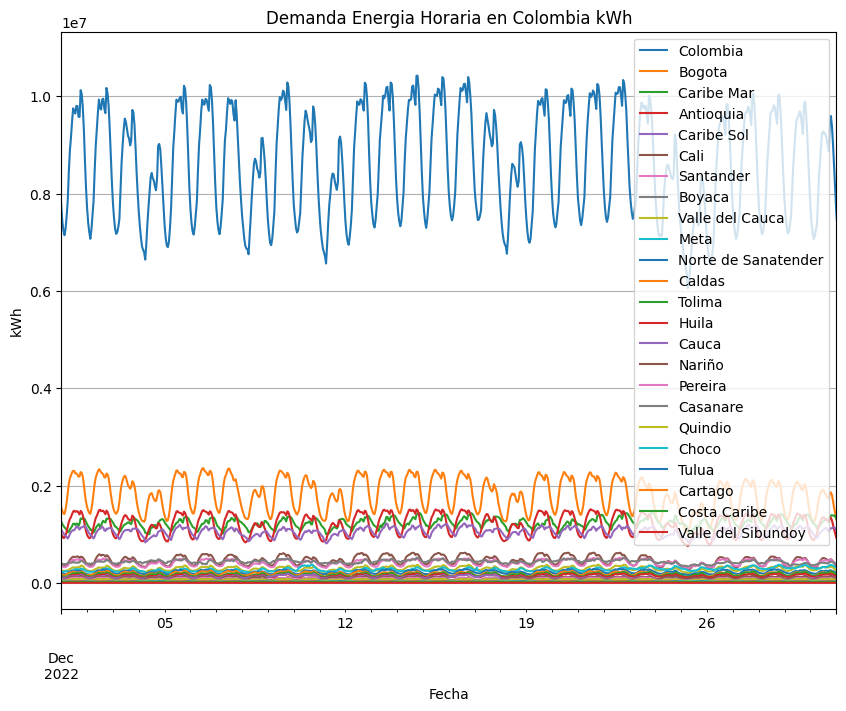

In [9]:
df.plot(kind='line',figsize=(10,7.5),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2022-12-01','2022-12-31'))

# Normalizacion


In [10]:
df1=df.copy()

In [11]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(df1)
df1=scaler.transform(df1)
#plt.plot(df1)

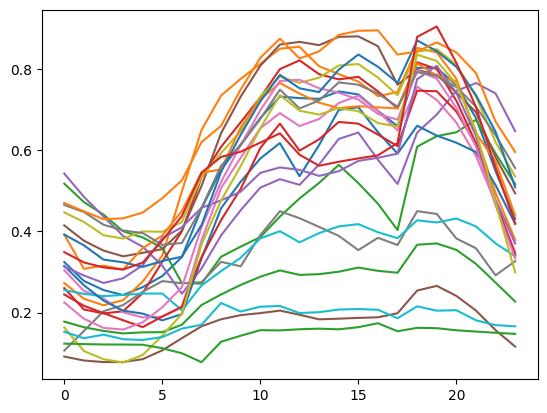

In [12]:
plt.plot(df1[0:24,:])
plt.show()

In [13]:
Ts1=df1[:,1:].copy()
out=df1[:,0]
print('Tamaño Serie Horaria: ', Ts1.shape)
print('Tamaño Serie Salida: ', out.shape)

Tamaño Serie Horaria:  (19728, 23)
Tamaño Serie Salida:  (19728,)


# Modelos DL


## TimeStep = 06

### Conjunto de Entrenamiento


In [14]:
#  Particion X,Y y Time_step/step_back/window
step_back = 6

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
# X_test1=X_test1[:,0,:]
# X_train1=X_train1[:,0,:]

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1[:,0]
# Y_train1=Y_train1[:,0]


In [15]:
# Nuemero de Epocas
N=100
bsz=512

In [16]:
callbacks = [keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, verbose=1),]

### LSTM

In [17]:
model_LSTM = keras.models.Sequential([
                                     keras.layers.LSTM(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(1)
])
model_LSTM.summary()

# Training

model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 100)            49600     
                                                                 
 lstm_1 (LSTM)               (None, 6, 100)            80400     
                                                                 
 lstm_2 (LSTM)               (None, 6, 100)            80400     
                                                                 
 lstm_3 (LSTM)               (None, 1)                 408       
                                                                 
Total params: 210,808
Trainable params: 210,808
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 14s 91ms/step - loss: 0.0781 - mae: 0.2259 - mse: 0.0781 - val_loss: 0.0350 - val_mae: 0.1667 - val_mse: 0.0350 - lr: 0.0010
Epoc

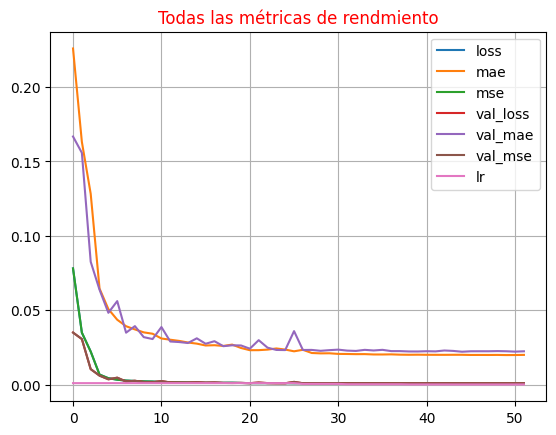

In [18]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### ANN

In [19]:
model_ANN = keras.models.Sequential([
                                     keras.layers.Dense(100, input_shape=(step_back,Ts1.shape[1],)),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(1)
])
model_ANN.summary()

# Training

model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_ANN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, validation_split=0.2) #

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6, 100)            2400      
                                                                 
 dense_1 (Dense)             (None, 6, 100)            10100     
                                                                 
 dense_2 (Dense)             (None, 6, 100)            10100     
                                                                 
 dense_3 (Dense)             (None, 6, 1)              101       
                                                                 
Total params: 22,701
Trainable params: 22,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 21ms/step - loss: 0.0859 - mae: 0.2368 - mse: 0.0859 - val_loss: 0.0459 - val_mae: 0.1846 - val_mse: 0.0459
Epoch 2/100
25/25 

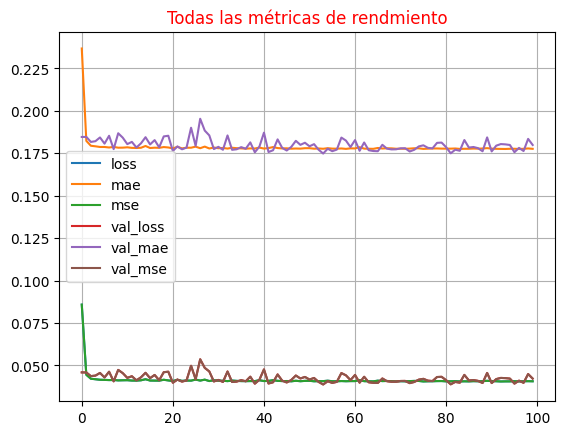

In [20]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### GRU

In [21]:
model_GRU = keras.models.Sequential([
                                     keras.layers.GRU(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(1)
])
model_GRU.summary()

# Training
metrics=['mae', 'mse']

model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 6, 100)            37500     
                                                                 
 gru_1 (GRU)                 (None, 6, 100)            60600     
                                                                 
 gru_2 (GRU)                 (None, 6, 100)            60600     
                                                                 
 gru_3 (GRU)                 (None, 1)                 309       
                                                                 
Total params: 159,009
Trainable params: 159,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 12s 168ms/step - loss: 0.0510 - mae: 0.1810 - mse: 0.0510 - val_loss: 0.0259 - val_mae: 0.1420 - val_mse: 0.0259 - lr: 0.0010
E

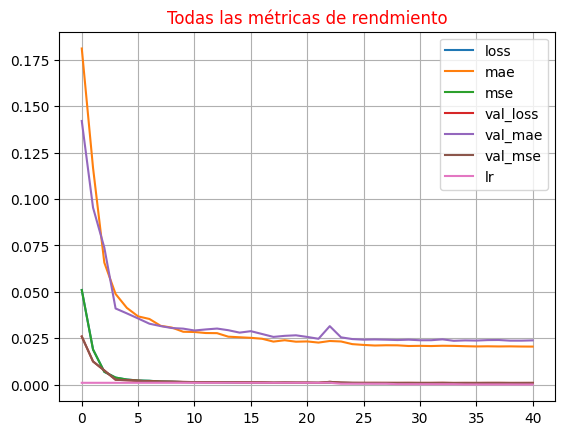

In [22]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### RNN

In [23]:
model_RNN = keras.models.Sequential([
                                     keras.layers.SimpleRNN(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(1)
])
model_RNN.summary()

# Training

metrics=['mae', 'mse']
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6, 100)            12400     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 6, 100)            20100     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 6, 100)            20100     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 102       
                                                                 
Total params: 52,702
Trainable params: 52,702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 6s 50ms/step - loss: 0.2479 - mae: 0.3888 - mse: 0.2479 - val_loss: 0.0241 - val_mae: 0.1283 - val_mse: 0.0241 - lr: 0.0010
Epoch

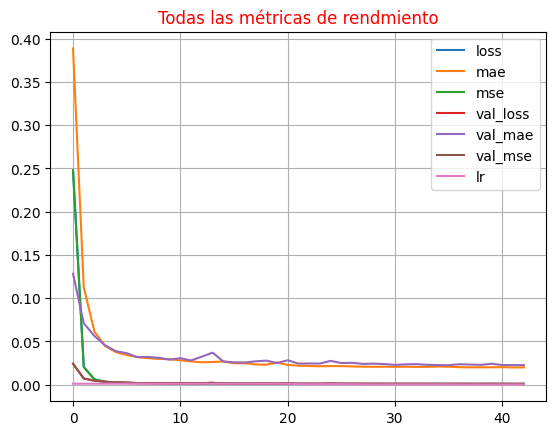

In [24]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

# Rendimiento

In [ ]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM,forecasting_ANN[:,0,0]]
model_names_DL = ['RNN', 'GRU', 'LSTM','ANN']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM','ANN'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(4):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))




124/124 [==============================] - 0s 2ms/step


124/124 [==============================] - 0s 3ms/step


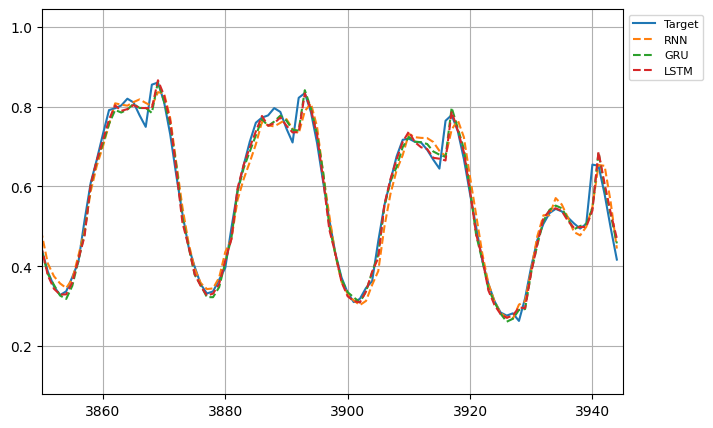

╒═════════════╤═════════════╤═════════════╤═════════════╕
│ Metrics     │         RNN │         GRU │        LSTM │
╞═════════════╪═════════════╪═════════════╪═════════════╡
│ MSE         │ 0.04151     │ 0.03121     │ 0.029       │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ RMSE        │ 0.00172309  │ 0.000974029 │ 0.000841159 │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ MAE         │ 0.03244     │ 0.02384     │ 0.02231     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ R2          │ 0.95725     │ 0.97584     │ 0.97913     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ cnSMAPE     │ 0.94487     │ 0.9604      │ 0.96199     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_PS  │ 0           │ 0           │ 0           │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_TT  │ 0.313815    │ 0.288855    │ 0.759381    │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_Var 

In [ ]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM]
model_names_DL = ['RNN', 'GRU', 'LSTM']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(3):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))



In [ ]:
tablas=pd.DataFrame(tablas)
tablas.to_excel("/content/DL_M_6S.xlsx")
files.download("/content/DL_M_6S.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TimeStep =12

### Conjunto de Entrenamiento


In [ ]:
#  Particion X,Y y Time_step/step_back/window
step_back = 12

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
# X_test1=X_test1[:,0,:]
# X_train1=X_train1[:,0,:]

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1[:,0]
# Y_train1=Y_train1[:,0]

### LSTM

In [ ]:
model_LSTM = keras.models.Sequential([
                                     keras.layers.LSTM(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(1)
])
model_LSTM.summary()

# Training

model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 100)           49600     
                                                                 
 lstm_5 (LSTM)               (None, 12, 100)           80400     
                                                                 
 lstm_6 (LSTM)               (None, 12, 100)           80400     
                                                                 
 lstm_7 (LSTM)               (None, 1)                 408       
                                                                 
Total params: 210,808
Trainable params: 210,808
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 9s 68ms/step - loss: 0.0574 - mae: 0.1993 - mse: 0.0574 - val_loss: 0.0388 - val_mae: 0.1725 - val_mse: 0.0388 - lr: 0.0010
Epo

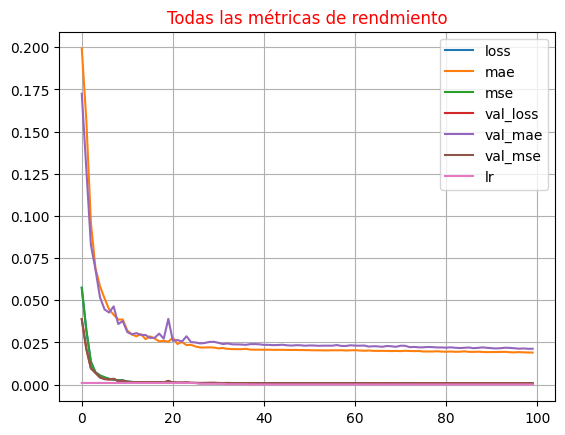

In [ ]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### ANN

In [ ]:
model_ANN = keras.models.Sequential([
                                     keras.layers.Dense(100, input_shape=(step_back,Ts1.shape[1],)),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(1)
])
model_ANN.summary()

# Training

model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_ANN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz,callbacks=callbacks, validation_split=0.2) #

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12, 100)           2400      
                                                                 
 dense_5 (Dense)             (None, 12, 100)           10100     
                                                                 
 dense_6 (Dense)             (None, 12, 100)           10100     
                                                                 
 dense_7 (Dense)             (None, 12, 1)             101       
                                                                 
Total params: 22,701
Trainable params: 22,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 16ms/step - loss: 0.0789 - mae: 0.2279 - mse: 0.0789 - val_loss: 0.0698 - val_mae: 0.2186 - val_mse: 0.0698 - lr: 0.0010
Epoch

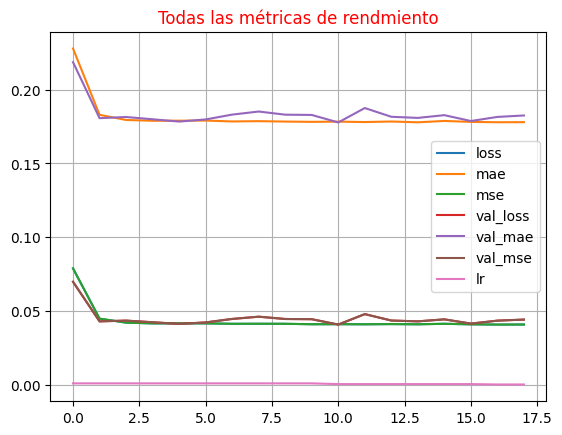

In [ ]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### GRU

In [ ]:
model_GRU = keras.models.Sequential([
                                     keras.layers.GRU(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(1)
])
model_GRU.summary()

# Training
metrics=['mae', 'mse']

model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 12, 100)           37500     
                                                                 
 gru_5 (GRU)                 (None, 12, 100)           60600     
                                                                 
 gru_6 (GRU)                 (None, 12, 100)           60600     
                                                                 
 gru_7 (GRU)                 (None, 1)                 309       
                                                                 
Total params: 159,009
Trainable params: 159,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 9s 61ms/step - loss: 0.0539 - mae: 0.1819 - mse: 0.0539 - val_loss: 0.0289 - val_mae: 0.1427 - val_mse: 0.0289 - lr: 0.0010
Epo

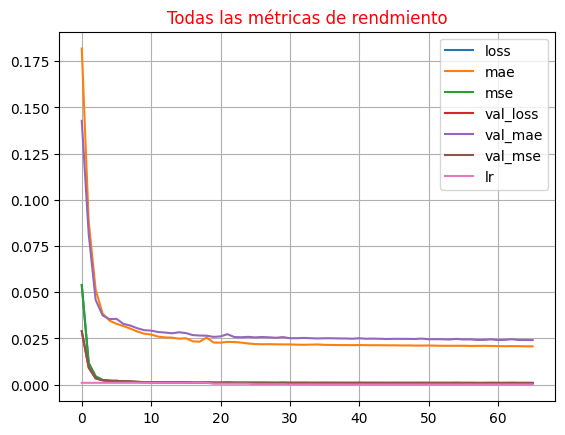

In [ ]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### RNN

In [ ]:
model_RNN = keras.models.Sequential([
                                     keras.layers.SimpleRNN(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(1)
])
model_RNN.summary()

# Training

metrics=['mae', 'mse']
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, 12, 100)           12400     
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 12, 100)           20100     
                                                                 
 simple_rnn_18 (SimpleRNN)   (None, 12, 100)           20100     
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 1)                 102       
                                                                 
Total params: 52,702
Trainable params: 52,702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 6s 67ms/step - loss: 0.2502 - mae: 0.3901 - mse: 0.2502 - val_loss: 0.1554 - val_mae: 0.3454 - val_mse: 0.1554
Epoch 2/100
25/25

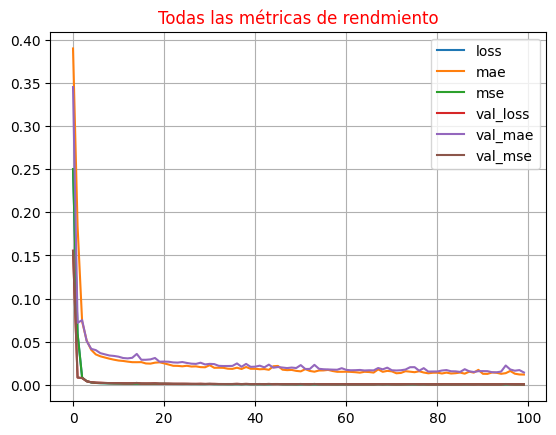

In [ ]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

# Rendimiento

124/124 [==============================] - 0s 2ms/step


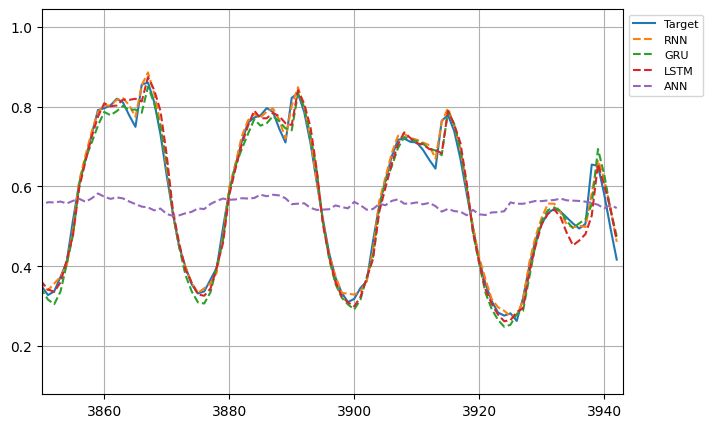

╒═════════════╤═════════════╤═════════════╤═════════════╤═══════════════╕
│ Metrics     │         RNN │         GRU │        LSTM │           ANN │
╞═════════════╪═════════════╪═════════════╪═════════════╪═══════════════╡
│ MSE         │ 0.01949     │ 0.03335     │ 0.02911     │  0.21261      │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ RMSE        │ 0.000379958 │ 0.00111206  │ 0.000847393 │  0.045201     │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ MAE         │ 0.0154      │ 0.02572     │ 0.02255     │  0.1838       │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ R2          │ 0.99058     │ 0.97243     │ 0.97899     │ -0.12081      │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ cnSMAPE     │ 0.97274     │ 0.95743     │ 0.96154     │  0.68772      │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ P_Value_PS  │ 0           │ 0       

In [ ]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM, forecasting_ANN[:,0,0]]
model_names_DL = ['RNN', 'GRU', 'LSTM','ANN']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM','ANN'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(4):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))




124/124 [==============================] - 0s 4ms/step


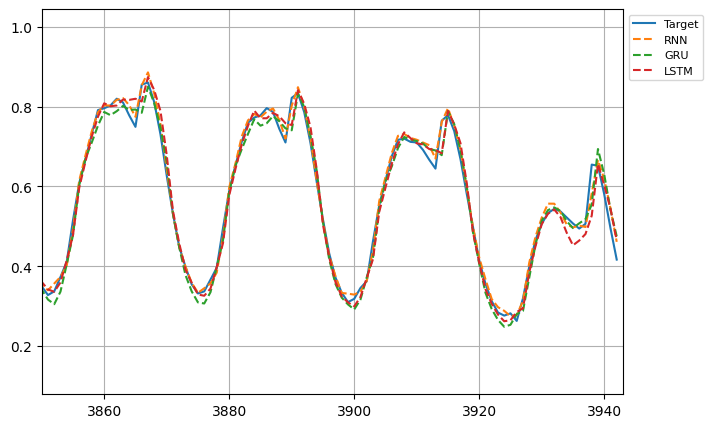

╒═════════════╤═════════════╤═════════════╤═════════════╕
│ Metrics     │         RNN │         GRU │        LSTM │
╞═════════════╪═════════════╪═════════════╪═════════════╡
│ MSE         │ 0.01949     │ 0.03335     │ 0.02911     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ RMSE        │ 0.000379958 │ 0.00111206  │ 0.000847393 │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ MAE         │ 0.0154      │ 0.02572     │ 0.02255     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ R2          │ 0.99058     │ 0.97243     │ 0.97899     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ cnSMAPE     │ 0.97274     │ 0.95743     │ 0.96154     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_PS  │ 0           │ 0           │ 0           │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_TT  │ 0.541342    │ 0.159489    │ 0.819667    │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_Var 

In [ ]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM]
model_names_DL = ['RNN', 'GRU', 'LSTM']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(3):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))



In [ ]:
tablas=pd.DataFrame(tablas)
tablas.to_excel("/content/DL_M_12S.xlsx")
files.download("/content/DL_M_12S.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TimeStep =18

### Conjunto de Entrenamiento


In [ ]:
#  Particion X,Y y Time_step/step_back/window
step_back = 18

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
# X_test1=X_test1[:,0,:]
# X_train1=X_train1[:,0,:]

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1[:,0]
# Y_train1=Y_train1[:,0]

### LSTM

In [ ]:
model_LSTM = keras.models.Sequential([
                                     keras.layers.LSTM(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(1)
])
model_LSTM.summary()

# Training

model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 18, 100)           49600     
                                                                 
 lstm_9 (LSTM)               (None, 18, 100)           80400     
                                                                 
 lstm_10 (LSTM)              (None, 18, 100)           80400     
                                                                 
 lstm_11 (LSTM)              (None, 1)                 408       
                                                                 
Total params: 210,808
Trainable params: 210,808
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 11s 74ms/step - loss: 0.0555 - mae: 0.1952 - mse: 0.0555 - val_loss: 0.0420 - val_mae: 0.1756 - val_mse: 0.0420 - lr: 0.0010
Ep

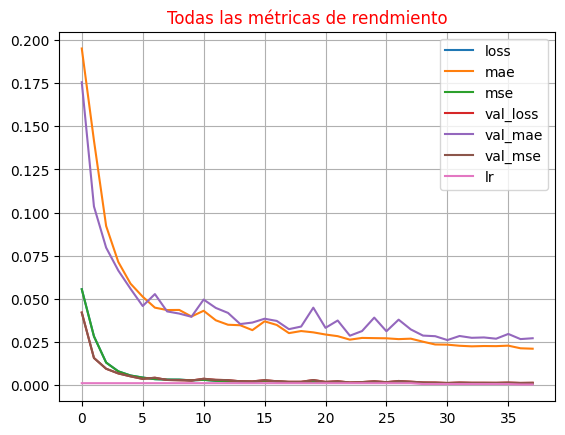

In [ ]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### ANN

In [ ]:
model_ANN = keras.models.Sequential([
                                     keras.layers.Dense(100, input_shape=(step_back,Ts1.shape[1],)),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(1)
])
model_ANN.summary()

# Training

model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_ANN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz,callbacks=callbacks, validation_split=0.2) #

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 18, 100)           2400      
                                                                 
 dense_9 (Dense)             (None, 18, 100)           10100     
                                                                 
 dense_10 (Dense)            (None, 18, 100)           10100     
                                                                 
 dense_11 (Dense)            (None, 18, 1)             101       
                                                                 
Total params: 22,701
Trainable params: 22,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 20ms/step - loss: 0.0870 - mae: 0.2382 - mse: 0.0870 - val_loss: 0.0668 - val_mae: 0.2142 - val_mse: 0.0668 - lr: 0.0010
Epoch

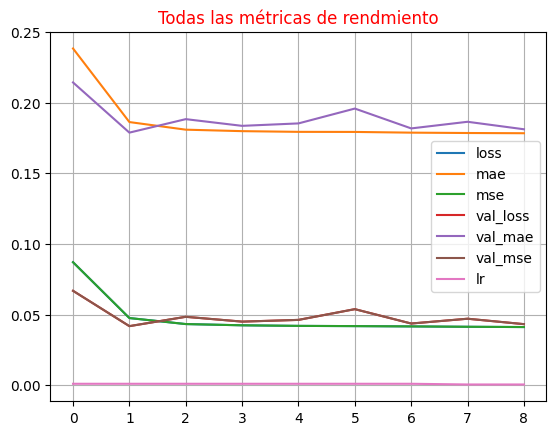

In [ ]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### GRU

In [ ]:
model_GRU = keras.models.Sequential([
                                     keras.layers.GRU(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(1)
])
model_GRU.summary()

# Training
metrics=['mae', 'mse']

model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 18, 100)           37500     
                                                                 
 gru_9 (GRU)                 (None, 18, 100)           60600     
                                                                 
 gru_10 (GRU)                (None, 18, 100)           60600     
                                                                 
 gru_11 (GRU)                (None, 1)                 309       
                                                                 
Total params: 159,009
Trainable params: 159,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 9s 69ms/step - loss: 0.0460 - mae: 0.1641 - mse: 0.0460 - val_loss: 0.0171 - val_mae: 0.1118 - val_mse: 0.0171 - lr: 0.0010
Ep

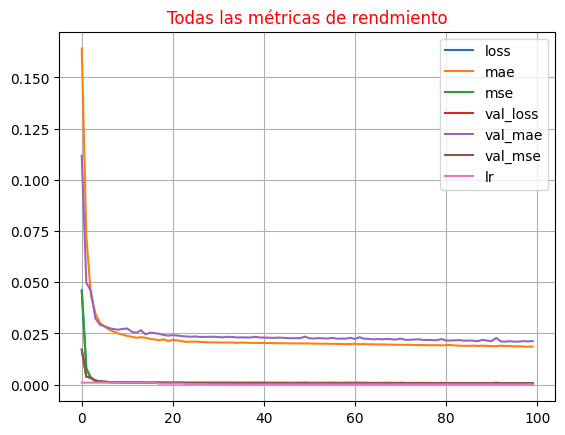

In [ ]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### RNN

In [ ]:
model_RNN = keras.models.Sequential([
                                     keras.layers.SimpleRNN(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(1)
])
model_RNN.summary()

# Training

metrics=['mae', 'mse']
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 18, 100)           12400     
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 18, 100)           20100     
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 18, 100)           20100     
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 1)                 102       
                                                                 
Total params: 52,702
Trainable params: 52,702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 7s 92ms/step - loss: 0.0569 - mae: 0.1618 - mse: 0.0569 - val_loss: 0.0074 - val_mae: 0.0688 - val_mse: 0.0074 - lr: 0.0010
Epoc

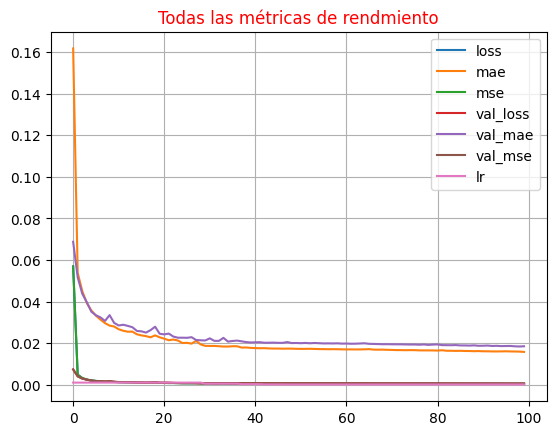

In [ ]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

# Rendimiento

124/124 [==============================] - 1s 4ms/step


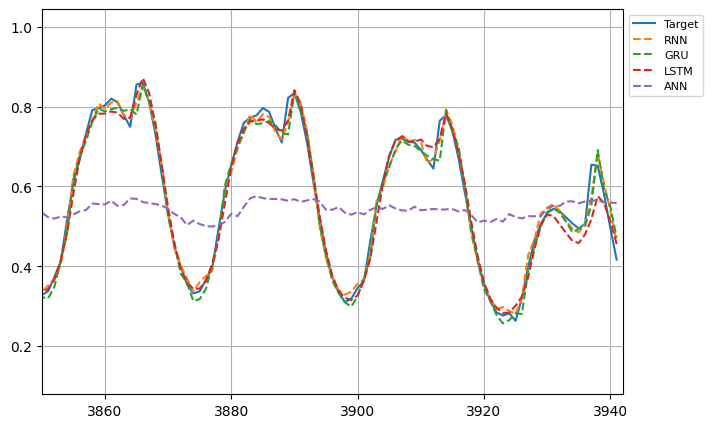

╒═════════════╤═════════════╤═════════════╤════════════╤═══════════════╕
│ Metrics     │         RNN │         GRU │       LSTM │           ANN │
╞═════════════╪═════════════╪═════════════╪════════════╪═══════════════╡
│ MSE         │ 0.02628     │ 0.03002     │ 0.03509    │  0.20272      │
├─────────────┼─────────────┼─────────────┼────────────┼───────────────┤
│ RMSE        │ 0.000690626 │ 0.000900925 │ 0.00123108 │  0.041096     │
├─────────────┼─────────────┼─────────────┼────────────┼───────────────┤
│ MAE         │ 0.02057     │ 0.0224      │ 0.0272     │  0.17642      │
├─────────────┼─────────────┼─────────────┼────────────┼───────────────┤
│ R2          │ 0.98288     │ 0.97767     │ 0.96948    │ -0.01876      │
├─────────────┼─────────────┼─────────────┼────────────┼───────────────┤
│ cnSMAPE     │ 0.96449     │ 0.96305     │ 0.95414    │  0.69784      │
├─────────────┼─────────────┼─────────────┼────────────┼───────────────┤
│ P_Value_PS  │ 0           │ 0           │ 0      

In [ ]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM, forecasting_ANN[:,0,0]]
model_names_DL = ['RNN', 'GRU', 'LSTM','ANN']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM','ANN'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(4):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))




124/124 [==============================] - 1s 4ms/step


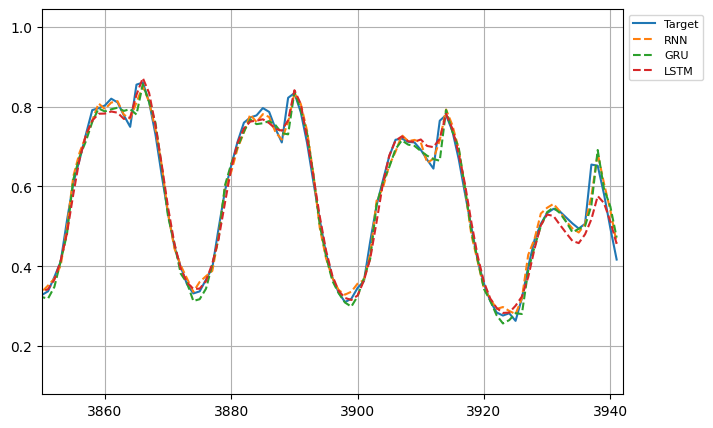

╒═════════════╤═════════════╤═════════════╤════════════╕
│ Metrics     │         RNN │         GRU │       LSTM │
╞═════════════╪═════════════╪═════════════╪════════════╡
│ MSE         │ 0.02628     │ 0.03002     │ 0.03509    │
├─────────────┼─────────────┼─────────────┼────────────┤
│ RMSE        │ 0.000690626 │ 0.000900925 │ 0.00123108 │
├─────────────┼─────────────┼─────────────┼────────────┤
│ MAE         │ 0.02057     │ 0.0224      │ 0.0272     │
├─────────────┼─────────────┼─────────────┼────────────┤
│ R2          │ 0.98288     │ 0.97767     │ 0.96948    │
├─────────────┼─────────────┼─────────────┼────────────┤
│ cnSMAPE     │ 0.96449     │ 0.96305     │ 0.95414    │
├─────────────┼─────────────┼─────────────┼────────────┤
│ P_Value_PS  │ 0           │ 0           │ 0          │
├─────────────┼─────────────┼─────────────┼────────────┤
│ P_Value_TT  │ 0.77069     │ 0.17446     │ 0.165357   │
├─────────────┼─────────────┼─────────────┼────────────┤
│ P_Value_Var │ 0.00620809  │ 0

In [ ]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM]
model_names_DL = ['RNN', 'GRU', 'LSTM']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(3):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))



In [ ]:
tablas=pd.DataFrame(tablas)
tablas.to_excel("/content/DL_M_18S.xlsx")
files.download("/content/DL_M_18S.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Tiempo

In [ ]:
fin = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido: ", tiempo_transcurrido, "segundos")

Tiempo transcurrido:  766.2990832328796 segundos
